# **H1B Prediction**

## **Data Collection**

In [1]:
import pandas as pd

In [2]:
!gdown --id 1ClwOCM37VfUw92MlRv5eGQy-dmmWnPRQ

Downloading...
From: https://drive.google.com/uc?id=1ClwOCM37VfUw92MlRv5eGQy-dmmWnPRQ
To: /content/LCA_Disclosure_Data_FY2021_Q1.xlsx
100% 59.7M/59.7M [00:00<00:00, 116MB/s]


In [3]:
df=pd.read_excel('/content/LCA_Disclosure_Data_FY2021_Q1.xlsx')

In [4]:
df_backup=df

In [5]:
df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,BEGIN_DATE,END_DATE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_NAME,TRADE_NAME_DBA,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_MIDDLE_NAME,EMPLOYER_POC_JOB_TITLE,EMPLOYER_POC_ADDRESS_1,EMPLOYER_POC_ADDRESS_2,EMPLOYER_POC_CITY,EMPLOYER_POC_STATE,EMPLOYER_POC_POSTAL_CODE,...,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,AGENT_ATTORNEY_EMAIL_ADDRESS,LAWFIRM_NAME_BUSINESS_NAME,STATE_OF_HIGHEST_COURT,NAME_OF_HIGHEST_STATE_COURT,WORKSITE_WORKERS,SECONDARY_ENTITY,SECONDARY_ENTITY_BUSINESS_NAME,WORKSITE_ADDRESS1,WORKSITE_ADDRESS2,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_TRACKING_NUMBER,PW_WAGE_LEVEL,PW_OES_YEAR,PW_OTHER_SOURCE,PW_OTHER_YEAR,PW_SURVEY_PUBLISHER,PW_SURVEY_NAME,TOTAL_WORKSITE_LOCATIONS,AGREE_TO_LC_STATEMENT,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-20268-843329,Certified,2020-09-24,2020-10-01,NaT,H-1B,Senior Technical Architect,15-1132,"Software Developers, Applications",Y,2021-02-13,2024-02-12,1,0,1,0,0,0,0,Hexaware Technologies Inc.,NaN,101 Wood Ave. S.,Suite 600,Iselin,NJ,8830,UNITED STATES OF AMERICA,NaN,16094096957,NaN,541512,Fernando,Caroline,NaN,Deputy Manager - Human Resources,101 Wood Ave. S.,Suite 600,Iselin,NJ,8830,...,1.646419e+10,NaN,gov@poorvichothani.com,"The Law Office of Poorvi Chothani, PLLC",NY,NEW YORK,1,Yes,Fannie Mae,"13150 World Gate Drive,",NaN,"Herndon,",FAIRFAX,VA,20170,103770.0,110770.0,Year,97406.0,Year,NaN,II,7/1/2020 - 6/30/2021,NaN,NaN,NaN,NaN,2,Y,Y,N,Y,Wage,NaN,Disclose Business,Chothani,Poorvi,R,"The Law office of Poorvi Chothani, PLLC",gov@poorvichothani.com
1,I-200-20268-843033,Certified,2020-09-24,2020-10-01,NaT,H-1B,Programmer Analyst\t,15-1131,Computer Programmers,Y,2020-09-24,2023-09-23,1,0,1,0,0,0,0,WIPRO LIMITED,NaN,2 TOWER CENTER BLVD,SUITE 2200,EAST BRUNSWICK,NJ,8816,UNITED STATES OF AMERICA,NaN,17325091586,NaN,541511,KAMBLE,DEEPALI,NaN,MANAGER,2 TOWER CENTER BLVD,SUITE 2200,EAST BRUNSWICK,NJ,8816,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Yes,BP International Ltd.,2800 FM 519 East,NaN,Texas City,GALVESTON,TX,77590,84510.0,NaN,Year,84510.0,Year,NaN,II,7/1/2020 - 6/30/2021,NaN,NaN,NaN,NaN,1,Y,Y,N,Y,Wage,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
2,I-200-20268-843527,Certified,2020-09-24,2020-10-01,NaT,H-1B,Software Developer,15-1132,"Software Developers, Applications",Y,2020-09-25,2023-09-24,6,1,1,1,1,1,1,"Mastech Digital InfoTech, Inc.","Mastech Digital InfoTech, Inc.",1305 Cherrington Parkway,"Bldg. 210, Suite 400",Moon Township,PA,15108,UNITED STATES OF AMERICA,PENNSYLVANIA,14127879553,NaN,541511,Palermo,Wendy,NaN,Manager - Immigration,1305 Cherrington Parkway,"Bldg. 210, Ste 400",Moon Township,PA,15108,...,NaN,NaN,NaN,NaN,NaN,NaN,6,Yes,PNC Bank,8100 Mohawk Dr,NaN,Strongsville,CUYAHOGA,OH,44136,70678.0,85678.0,Year,70678.0,Year,NaN,II,7/1/2020 - 6/30/2021,NaN,NaN,NaN,NaN,2,Y,Y,N,Y,Wage,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
3,I-200-20268-844241,Certified,2020-09-24,2020-10-01,NaT,H-1B,JAVA ANALYST 2,15-1121,Computer Systems Analysts,Y,2020-10-01,2023-09-30,1,0,0,0,0,0,1,VIRTUSA CORPORATION,NaN,132 Turnpike Road,SUITE 300,Southborough,MA,1772,UNITED STATES OF AMERICA,Massachusetts,15083897451,NaN,541511,CHAU,QUYEN,NaN,ASSOCIATE DIRECTOR - HR,132 TURNPIKE ROAD,SUITE 300,SOUTHBOROUGH,MA,1772,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Yes,"UNITED HEALTHCARE SERVICES, INC.",185 ASYLUM STREET,NaN,HARTFORD,HARTFORD

In [6]:
len(df)

80622

## **Data Pre-processing**

In [7]:
df.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE',
       'ORIGINAL_CERT_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE',
       'SOC_TITLE', 'FULL_TIME_POSITION', 'BEGIN_DATE', 'END_DATE',
       'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'EMPLOYER_NAME',
       'TRADE_NAME_DBA', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2',
       'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'NAICS_CODE', 'EMPLOYER_POC_LAST_NAME',
       'EMPLOYER_POC_FIRST_NAME', 'EMPLOYER_POC_MIDDLE_NAME',
       'EMPLOYER_POC_JOB_TITLE', 'EMPLOYER_POC_ADDRESS_1',
       'EMPLOYER_POC_ADDRESS_2', 'EMPLOYER_POC_CITY', 'EMPLOYER_POC_STATE',
       'EMPLOYER_POC_POSTAL_CODE', 'EMPLOYER_POC_COUNTRY',
       'EMPLOYER_POC_PROVINCE', 'EMPLOYER_POC_PHONE', 'EMPLOYER_P

In [8]:
df=df[['CASE_STATUS', 'BEGIN_DATE', 'END_DATE',
       'EMPLOYER_NAME', 'EMPLOYER_STATE', 'SOC_CODE', 'NAICS_CODE',
        'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'FULL_TIME_POSITION',
       'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'H1B_DEPENDENT', 'WORKSITE_COUNTY',
       'WORKSITE_STATE', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'WAGE_RATE_OF_PAY_FROM', 'WAGE_UNIT_OF_PAY']]

In [9]:
df

,CASE_STATUS,BEGIN_DATE,END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_COUNTY,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY
0,Certified,2021-02-13,2024-02-12,Hexaware Technologies Inc.,NJ,15-1132,541512,0,1,0,0,0,0,Y,97406.0,Year,Y,FAIRFAX,VA,N,Y,103770.0,Year
1,Certified,2020-09-24,2023-09-23,WIPRO LIMITED,NJ,15-1131,541511,0,1,0,0,0,0,Y,84510.0,Year,Y,GALVESTON,TX,N,Y,84510.0,Year
2,Certified,2020-09-25,2023-09-24,"Mastech Digital InfoTech, Inc.",PA,15-1132,541511,1,1,1,1,1,1,Y,70678.0,Year,Y,CUYAHOGA,OH,N,Y,70678.0,Year
3,Certified,2020-10-01,2023-09-30,VIRTUSA CORPORATION,MA,15-1121,541511,0,0,0,0,0,1,Y,81453.0,Year,Y,HARTFORD CITY,CT,N,Y,103376.0,Year
4,Certified,2020-10-05,2022-06-29,"XTGLOBAL, INC.",TX,15-1141,541511,0,0,0,0,0,1,Y,91146.0,Year,Y,WILLIAMSON,TX,N,Y,91146.0,Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80617,Withdrawn,2021-01-18,2024-01-17,"Facebook, Inc.",CA,15-1199,51913,0,0,0,0,0,1,Y,97510.0,Year,NaN,KING,WA,NaN,NaN,150000.0,Year
80618,Withdrawn,2021-01-08,2023-01-08,TOP QUALITY PAINTING INC.,MO,13-1111,238320,0,1,0,0,0,0,Y,49878.0,Year,NaN,ST CHARLES,MO,NaN,NaN,49878.0,Year
80619,Withdrawn,2021-02-21,2023-02-21,InsideSherpa Inc,NY,11-2022,611710,1,0,0,0,0,0,Y,110594.0,Year,NaN,NEW YORK,NY,NaN,NaN,138000.0,Year
80620,Withdrawn,2021-03-01,2023-03-01,"VT Mobile Aerospace Engineering, Inc.",AL,11-9199,336411,1,0,0,0,0,0,Y,72634.0,Year,NaN,MOBILE,AL,NaN,NaN,80690.0,Year


In [10]:
df.isna().sum()

CASE_STATUS                       0
BEGIN_DATE                        0
END_DATE                          0
EMPLOYER_NAME                     0
EMPLOYER_STATE                    0
SOC_CODE                          0
NAICS_CODE                        0
NEW_EMPLOYMENT                    0
CONTINUED_EMPLOYMENT              0
CHANGE_PREVIOUS_EMPLOYMENT        0
NEW_CONCURRENT_EMPLOYMENT         0
CHANGE_EMPLOYER                   0
AMENDED_PETITION                  0
FULL_TIME_POSITION                0
PREVAILING_WAGE                   0
PW_UNIT_OF_PAY                    0
H1B_DEPENDENT                  2635
WORKSITE_COUNTY                   2
WORKSITE_STATE                    0
WILLFUL_VIOLATOR               2636
SUPPORT_H1B                   55690
WAGE_RATE_OF_PAY_FROM             0
WAGE_UNIT_OF_PAY                  0
dtype: int64

In [11]:
df.WILLFUL_VIOLATOR.value_counts()

N    77955
Y       31
Name: WILLFUL_VIOLATOR, dtype: int64

In [12]:
def get_encoding(x):
  if x=='Y':
    return 1
  return 0

In [13]:
df['WILLFUL_VIOLATOR']=df['WILLFUL_VIOLATOR'].apply(lambda x : get_encoding(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.isna().sum()

CASE_STATUS                       0
BEGIN_DATE                        0
END_DATE                          0
EMPLOYER_NAME                     0
EMPLOYER_STATE                    0
SOC_CODE                          0
NAICS_CODE                        0
NEW_EMPLOYMENT                    0
CONTINUED_EMPLOYMENT              0
CHANGE_PREVIOUS_EMPLOYMENT        0
NEW_CONCURRENT_EMPLOYMENT         0
CHANGE_EMPLOYER                   0
AMENDED_PETITION                  0
FULL_TIME_POSITION                0
PREVAILING_WAGE                   0
PW_UNIT_OF_PAY                    0
H1B_DEPENDENT                  2635
WORKSITE_COUNTY                   2
WORKSITE_STATE                    0
WILLFUL_VIOLATOR                  0
SUPPORT_H1B                   55690
WAGE_RATE_OF_PAY_FROM             0
WAGE_UNIT_OF_PAY                  0
dtype: int64

In [15]:
df.SUPPORT_H1B.value_counts()

Y    24711
N      221
Name: SUPPORT_H1B, dtype: int64

In [16]:
df['SUPPORT_H1B']=df['SUPPORT_H1B'].apply(lambda x: get_encoding(x) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df.isna().sum()

CASE_STATUS                      0
BEGIN_DATE                       0
END_DATE                         0
EMPLOYER_NAME                    0
EMPLOYER_STATE                   0
SOC_CODE                         0
NAICS_CODE                       0
NEW_EMPLOYMENT                   0
CONTINUED_EMPLOYMENT             0
CHANGE_PREVIOUS_EMPLOYMENT       0
NEW_CONCURRENT_EMPLOYMENT        0
CHANGE_EMPLOYER                  0
AMENDED_PETITION                 0
FULL_TIME_POSITION               0
PREVAILING_WAGE                  0
PW_UNIT_OF_PAY                   0
H1B_DEPENDENT                 2635
WORKSITE_COUNTY                  2
WORKSITE_STATE                   0
WILLFUL_VIOLATOR                 0
SUPPORT_H1B                      0
WAGE_RATE_OF_PAY_FROM            0
WAGE_UNIT_OF_PAY                 0
dtype: int64

In [18]:
df.H1B_DEPENDENT.value_counts()

N    53061
Y    24926
Name: H1B_DEPENDENT, dtype: int64

In [19]:
df['H1B_DEPENDENT']=df['H1B_DEPENDENT'].apply(lambda x: get_encoding(x) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df

,CASE_STATUS,BEGIN_DATE,END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_COUNTY,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY
0,Certified,2021-02-13,2024-02-12,Hexaware Technologies Inc.,NJ,15-1132,541512,0,1,0,0,0,0,Y,97406.0,Year,1,FAIRFAX,VA,0,1,103770.0,Year
1,Certified,2020-09-24,2023-09-23,WIPRO LIMITED,NJ,15-1131,541511,0,1,0,0,0,0,Y,84510.0,Year,1,GALVESTON,TX,0,1,84510.0,Year
2,Certified,2020-09-25,2023-09-24,"Mastech Digital InfoTech, Inc.",PA,15-1132,541511,1,1,1,1,1,1,Y,70678.0,Year,1,CUYAHOGA,OH,0,1,70678.0,Year
3,Certified,2020-10-01,2023-09-30,VIRTUSA CORPORATION,MA,15-1121,541511,0,0,0,0,0,1,Y,81453.0,Year,1,HARTFORD CITY,CT,0,1,103376.0,Year
4,Certified,2020-10-05,2022-06-29,"XTGLOBAL, INC.",TX,15-1141,541511,0,0,0,0,0,1,Y,91146.0,Year,1,WILLIAMSON,TX,0,1,91146.0,Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80617,Withdrawn,2021-01-18,2024-01-17,"Facebook, Inc.",CA,15-1199,51913,0,0,0,0,0,1,Y,97510.0,Year,0,KING,WA,0,0,150000.0,Year
80618,Withdrawn,2021-01-08,2023-01-08,TOP QUALITY PAINTING INC.,MO,13-1111,238320,0,1,0,0,0,0,Y,49878.0,Year,0,ST CHARLES,MO,0,0,49878.0,Year
80619,Withdrawn,2021-02-21,2023-02-21,InsideSherpa Inc,NY,11-2022,611710,1,0,0,0,0,0,Y,110594.0,Year,0,NEW YORK,NY,0,0,138000.0,Year
80620,Withdrawn,2021-03-01,2023-03-01,"VT Mobile Aerospace Engineering, Inc.",AL,11-9199,336411,1,0,0,0,0,0,Y,72634.0,Year,0,MOBILE,AL,0,0,80690.0,Year


In [21]:
z=[]
for index,row in df.iterrows():
    if row.WAGE_UNIT_OF_PAY=='Year':
        z.append(1)
    elif row.WAGE_UNIT_OF_PAY=='Hour':
        z.append(1920)
    elif row.WAGE_UNIT_OF_PAY=='Month':
        z.append(12)
    elif row.WAGE_UNIT_OF_PAY=='Week':
        z.append(48)
    elif row.WAGE_UNIT_OF_PAY=='Bi-Weekly':
        z.append(96)
    else:
        z.append(0)

In [22]:
df['multiplier']=z

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df['PREVAILING_WAGE_int']=pd.to_numeric(df.PREVAILING_WAGE)
df['Total_Wage']=(df.PREVAILING_WAGE_int)*df.multiplier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df.columns

Index(['CASE_STATUS', 'BEGIN_DATE', 'END_DATE', 'EMPLOYER_NAME',
       'EMPLOYER_STATE', 'SOC_CODE', 'NAICS_CODE', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WORKSITE_COUNTY', 'WORKSITE_STATE',
       'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'WAGE_RATE_OF_PAY_FROM',
       'WAGE_UNIT_OF_PAY', 'multiplier', 'PREVAILING_WAGE_int', 'Total_Wage'],
      dtype='object')

In [25]:
df

,CASE_STATUS,BEGIN_DATE,END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_COUNTY,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,multiplier,PREVAILING_WAGE_int,Total_Wage
0,Certified,2021-02-13,2024-02-12,Hexaware Technologies Inc.,NJ,15-1132,541512,0,1,0,0,0,0,Y,97406.0,Year,1,FAIRFAX,VA,0,1,103770.0,Year,1,97406.0,97406.0
1,Certified,2020-09-24,2023-09-23,WIPRO LIMITED,NJ,15-1131,541511,0,1,0,0,0,0,Y,84510.0,Year,1,GALVESTON,TX,0,1,84510.0,Year,1,84510.0,84510.0
2,Certified,2020-09-25,2023-09-24,"Mastech Digital InfoTech, Inc.",PA,15-1132,541511,1,1,1,1,1,1,Y,70678.0,Year,1,CUYAHOGA,OH,0,1,70678.0,Year,1,70678.0,70678.0
3,Certified,2020-10-01,2023-09-30,VIRTUSA CORPORATION,MA,15-1121,541511,0,0,0,0,0,1,Y,81453.0,Year,1,HARTFORD CITY,CT,0,1,103376.0,Year,1,81453.0,81453.0
4,Certified,2020-10-05,2022-06-29,"XTGLOBAL, INC.",TX,15-1141,541511,0,0,0,0,0,1,Y,91146.0,Year,1,WILLIAMSON,TX,0,1,91146.0,Year,1,91146.0,91146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80617,Withdrawn,2021-01-18,2024-01-17,"Facebook, Inc.",CA,15-1199,51913,0,0,0,0,0,1,Y,97510.0,Year,0,KING,WA,0,0,150000.0,Year,1,97510.0,97510.0
80618,Withdrawn,2021-01-08,2023-01-08,TOP QUALITY PAINTING INC.,MO,13-1111,238320,0,1,0,0,0,0,Y,49878.0,Year,0,ST CHARLES,MO,0,0,49878.0,Year,1,49878.0,49878.0
80619,Withdrawn,2021-02-21,2023-02-21,InsideSherpa Inc,NY,11-2022,611710,1,0,0,0,0,0,Y,110594.0,Year,0,NEW YORK,NY,0,0,138000.0,Year,1,110594.0,110594.0
80620,Withdrawn,2021-03-01,2023-03-01,"VT Mobile Aerospace Engineering, Inc.",AL,11-9199,336411,1,0,0,0,0,0,Y,72634.0,Year,0,MOBILE,AL,0,0,80690.0,Year,1,72634.0,72634.0


In [26]:
df=df[['CASE_STATUS', 'EMPLOYER_NAME',
       'EMPLOYER_STATE', 'SOC_CODE', 'NAICS_CODE', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION',
       'H1B_DEPENDENT','WORKSITE_STATE',
       'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'Total_Wage']]

In [27]:
df.CASE_STATUS.value_counts()

Certified                75064
Certified - Withdrawn     3333
Withdrawn                 1723
Denied                     502
Name: CASE_STATUS, dtype: int64

In [28]:
df = df.drop(df[(df.CASE_STATUS =='Certified - Withdrawn')].index)
df = df.drop(df[(df.CASE_STATUS =='Withdrawn')].index)

In [29]:
df

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,H1B_DEPENDENT,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,Total_Wage
0,Certified,Hexaware Technologies Inc.,NJ,15-1132,541512,0,1,0,0,0,0,Y,1,VA,0,1,97406.0
1,Certified,WIPRO LIMITED,NJ,15-1131,541511,0,1,0,0,0,0,Y,1,TX,0,1,84510.0
2,Certified,"Mastech Digital InfoTech, Inc.",PA,15-1132,541511,1,1,1,1,1,1,Y,1,OH,0,1,70678.0
3,Certified,VIRTUSA CORPORATION,MA,15-1121,541511,0,0,0,0,0,1,Y,1,CT,0,1,81453.0
4,Certified,"XTGLOBAL, INC.",TX,15-1141,541511,0,0,0,0,0,1,Y,1,TX,0,1,91146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80568,Denied,Blueboard Inc.,CA,11-3031,51121,0,0,0,0,1,0,Y,0,CA,0,0,141315.0
80569,Denied,Seabury Hall,HI,25-2031,611110,1,0,0,0,1,0,Y,0,HI,0,0,57310.0
80570,Denied,Seabury Hall,HI,25-2022,611110,1,0,0,0,1,0,Y,0,HI,0,0,54150.0
80571,Denied,Seabury Hall,HI,25-2031,611110,1,0,0,0,1,0,Y,0,HI,0,0,57310.0


In [30]:
def get_case_status(x):
  if x=='Certified':
    return 1
  return 0

In [31]:
def get_full_time_pos(x):
  if x=='Y':
    return 1
  return 0

In [32]:
df['CASE_STATUS']=df['CASE_STATUS'].apply(lambda x : get_case_status(x))

In [33]:
df['FULL_TIME_POSITION']=df['FULL_TIME_POSITION'].apply(lambda x : get_full_time_pos(x))

In [34]:
df

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,H1B_DEPENDENT,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,Total_Wage
0,1,Hexaware Technologies Inc.,NJ,15-1132,541512,0,1,0,0,0,0,1,1,VA,0,1,97406.0
1,1,WIPRO LIMITED,NJ,15-1131,541511,0,1,0,0,0,0,1,1,TX,0,1,84510.0
2,1,"Mastech Digital InfoTech, Inc.",PA,15-1132,541511,1,1,1,1,1,1,1,1,OH,0,1,70678.0
3,1,VIRTUSA CORPORATION,MA,15-1121,541511,0,0,0,0,0,1,1,1,CT,0,1,81453.0
4,1,"XTGLOBAL, INC.",TX,15-1141,541511,0,0,0,0,0,1,1,1,TX,0,1,91146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80568,0,Blueboard Inc.,CA,11-3031,51121,0,0,0,0,1,0,1,0,CA,0,0,141315.0
80569,0,Seabury Hall,HI,25-2031,611110,1,0,0,0,1,0,1,0,HI,0,0,57310.0
80570,0,Seabury Hall,HI,25-2022,611110,1,0,0,0,1,0,1,0,HI,0,0,54150.0
80571,0,Seabury Hall,HI,25-2031,611110,1,0,0,0,1,0,1,0,HI,0,0,57310.0


In [35]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'EMPLOYER_STATE', 'SOC_CODE',
       'NAICS_CODE', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'FULL_TIME_POSITION',
       'H1B_DEPENDENT', 'WORKSITE_STATE', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B',
       'Total_Wage'],
      dtype='object')

In [36]:
EMPLOYER_NAME=df.EMPLOYER_NAME.unique()
with open('EMPLOYER_NAME.txt', 'w') as filehandle:
    for listitem in EMPLOYER_NAME:
        filehandle.write(str(listitem)+ '\n')

In [37]:
EMPLOYER_STATE=df.EMPLOYER_STATE.unique()
with open('EMPLOYER_STATE.txt', 'w') as filehandle:
    for listitem in EMPLOYER_STATE:
        filehandle.write(str(listitem)+ '\n')

In [38]:
SOC_CODE=df.SOC_CODE.unique()
with open('SOC_CODE.txt', 'w') as filehandle:
    for listitem in SOC_CODE:
        filehandle.write(str(listitem)+ '\n')

In [39]:
NAICS_CODE=df.NAICS_CODE.unique()
with open('NAICS_CODE.txt', 'w') as filehandle:
    for listitem in NAICS_CODE:
        filehandle.write(str(listitem)+ '\n')

In [40]:
WORKSITE_STATE=df.WORKSITE_STATE.unique()
with open('WORKSITE_STATE.txt', 'w') as filehandle:
    for listitem in WORKSITE_STATE:
        filehandle.write(str(listitem)+ '\n')

In [41]:
from sklearn import preprocessing

In [42]:
EMPLOYER_NAME_le = preprocessing.LabelEncoder()
EMPLOYER_STATE_le = preprocessing.LabelEncoder()
SOC_CODE_le = preprocessing.LabelEncoder()
NAICS_CODE_le = preprocessing.LabelEncoder()
WORKSITE_STATE_le = preprocessing.LabelEncoder()

In [43]:
x=df

In [44]:
x.EMPLOYER_NAME=EMPLOYER_NAME_le.fit_transform(x.EMPLOYER_NAME.astype(str))
x.EMPLOYER_STATE=EMPLOYER_STATE_le.fit_transform(x.EMPLOYER_STATE.astype(str))
x.SOC_CODE=SOC_CODE_le.fit_transform(x.SOC_CODE.astype(str))
x.NAICS_CODE=NAICS_CODE_le.fit_transform(x.NAICS_CODE.astype(str))
x.WORKSITE_STATE=WORKSITE_STATE_le.fit_transform(x.WORKSITE_STATE.astype(str))

In [45]:
import pickle

In [46]:
pickle.dump(EMPLOYER_NAME_le, open('EMPLOYER_NAME_le', 'wb'))
pickle.dump(EMPLOYER_STATE_le, open('EMPLOYER_STATE_le', 'wb'))
pickle.dump(SOC_CODE_le, open('SOC_CODE_le', 'wb'))
pickle.dump(NAICS_CODE_le, open('NAICS_CODE_le', 'wb'))
pickle.dump(WORKSITE_STATE_le, open('WORKSITE_STATE_le', 'wb'))

In [47]:
x

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,H1B_DEPENDENT,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,Total_Wage
0,1,6352,33,66,909,0,1,0,0,0,0,1,1,48,0,1,97406.0
1,1,15416,33,65,908,0,1,0,0,0,0,1,1,46,0,1,84510.0
2,1,8786,40,66,908,1,1,1,1,1,1,1,1,37,0,1,70678.0
3,1,15013,20,63,908,0,0,0,0,0,1,1,1,6,0,1,81453.0
4,1,15754,46,69,908,0,0,0,0,0,1,1,1,46,0,1,91146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80568,0,2144,4,8,726,0,0,0,0,1,0,1,0,4,0,0,141315.0
80569,0,12535,12,223,1008,1,0,0,0,1,0,1,0,12,0,0,57310.0
80570,0,12535,12,222,1008,1,0,0,0,1,0,1,0,12,0,0,54150.0
80571,0,12535,12,223,1008,1,0,0,0,1,0,1,0,12,0,0,57310.0


## **Model Training**

In [48]:
X=x.drop('CASE_STATUS', axis=1)

In [49]:
Y=x.CASE_STATUS

In [50]:
Y.value_counts()

1    75064
0      502
Name: CASE_STATUS, dtype: int64

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression

In [52]:
import xgboost
names = ["Nearest Neighbors",# "Linear SVM",# "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA","XG","LinearRegression"]

classifiers = [
    KNeighborsClassifier(2),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    ]

In [53]:
trainX, testX = train_test_split(X, test_size=0.30, random_state=1)
trainY, testY = train_test_split(Y, test_size=0.30, random_state=1)
trainX

,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,H1B_DEPENDENT,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,Total_Wage
64712,5046,36,66,908,0,1,0,0,0,0,1,0,52,0,0,115856.0
46269,7825,33,63,909,0,0,0,0,0,1,1,1,6,0,1,106205.0
59542,332,36,101,889,0,0,0,0,0,1,1,0,36,0,0,81848.0
46058,14160,36,132,1013,1,0,0,0,0,0,1,0,36,0,0,51912.0
44075,2616,46,63,909,0,1,0,0,0,0,1,1,15,0,1,91520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20609,6062,4,74,908,0,0,0,0,1,0,1,1,51,0,1,97510.0
21440,3670,4,74,911,0,0,0,0,1,0,1,0,16,0,0,145579.0
78247,11440,5,1,725,0,1,0,0,0,0,1,0,35,0,0,92227.0
50057,5135,4,66,765,0,0,0,0,0,1,1,1,4,0,1,136056.0


In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
import seaborn as sns
import pickle
from time import time
from sklearn.utils import resample

In [55]:
def muller_loop(trainX, testX, trainY, testY):
  max_score = 0.0
  max_class = ''
  # iterate over classifiers
  score_compare={}
  index=0
  accuracy={}
  specificity={}
  sensitivity={}
  for name, clf in zip(names, classifiers):
      # print(accuracy)
      start_time = time()
      clf.fit(trainX, trainY)
      pickle.dump(clf, open(name, 'wb'))

      score = 100.0 * clf.score(testX, testY)
      y_pred=clf.predict(testX)
      print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
      
      
      accuracy[names[index]]=accuracy_score(testY,y_pred)*100
      cm=confusion_matrix(testY, y_pred)

      print(cm)
      sensitivity[names[index]] = (cm[0,0]/(cm[0,0]+cm[0,1]))*100
      specificity[names[index]] = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
      index+=1
      if score > max_score:
          clf_best = clf
          max_score = score
          max_class = name

      print(80*'-*')

  print(80*'-' )
  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
  print(accuracy)
  accuracy=pd.DataFrame.from_dict(accuracy,orient='index').reset_index()
  sensitivity=pd.DataFrame.from_dict(sensitivity,orient='index').reset_index()
  specificity=pd.DataFrame.from_dict(specificity,orient='index').reset_index()
  # print(accuracy)
  accuracy.columns=['model_name','accuracy']
  sensitivity.columns=['model_name','sensitivity']
  specificity.columns=['model_name','specificity']
  plt.figure(figsize=(16, 6))
  ax = sns.lineplot(data=accuracy, x='model_name', y='accuracy',legend='full')
  ax = sns.lineplot(data=sensitivity, x='model_name', y='sensitivity',legend='full')
  ax = sns.lineplot(data=specificity, x='model_name', y='specificity',legend='full')
  ax = sns.barplot(data=accuracy, x='model_name', y='accuracy')
  plt.title('Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')

Classifier = Nearest Neighbors, Score (test, accuracy) = 98.40, Training time = 30.82 seconds
[[   27   128]
 [  235 22280]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Decision Tree, Score (test, accuracy) = 99.33, Training time = 0.12 seconds
[[    4   151]
 [    0 22515]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Random Forest, Score (test, accuracy) = 99.32, Training time = 0.18 seconds
[[    0   155]
 [    0 22515]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Neural Net, Score (test, accuracy) = 99.30, Training time = 21.28 seconds
[[    1   154]
 [    5 22510]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


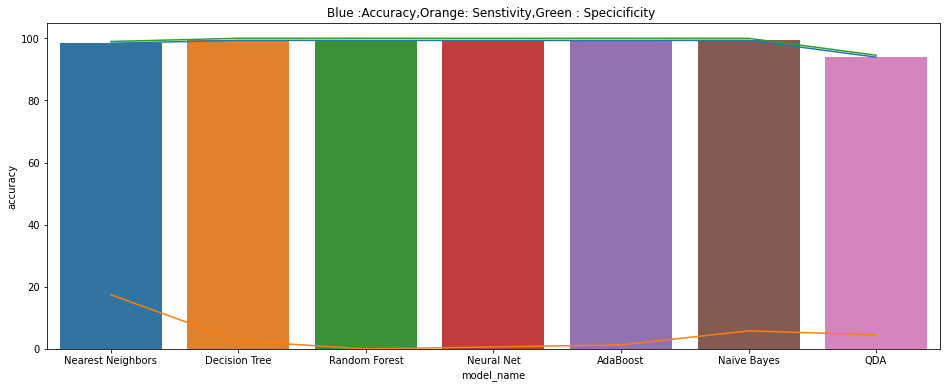

In [56]:
muller_loop(trainX, testX, trainY, testY)

In [57]:
x

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,H1B_DEPENDENT,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,Total_Wage
0,1,6352,33,66,909,0,1,0,0,0,0,1,1,48,0,1,97406.0
1,1,15416,33,65,908,0,1,0,0,0,0,1,1,46,0,1,84510.0
2,1,8786,40,66,908,1,1,1,1,1,1,1,1,37,0,1,70678.0
3,1,15013,20,63,908,0,0,0,0,0,1,1,1,6,0,1,81453.0
4,1,15754,46,69,908,0,0,0,0,0,1,1,1,46,0,1,91146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80568,0,2144,4,8,726,0,0,0,0,1,0,1,0,4,0,0,141315.0
80569,0,12535,12,223,1008,1,0,0,0,1,0,1,0,12,0,0,57310.0
80570,0,12535,12,222,1008,1,0,0,0,1,0,1,0,12,0,0,54150.0
80571,0,12535,12,223,1008,1,0,0,0,1,0,1,0,12,0,0,57310.0


In [58]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
80568    0
80569    0
80570    0
80571    0
80572    0
Name: CASE_STATUS, Length: 75566, dtype: int64

## **Upsampling**

Classifier = Nearest Neighbors, Score (test, accuracy) = 99.23, Training time = 117.37 seconds
[[22363     0]
 [  349 22327]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Decision Tree, Score (test, accuracy) = 68.21, Training time = 0.22 seconds
[[14709  7654]
 [ 6664 16012]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Random Forest, Score (test, accuracy) = 66.09, Training time = 0.33 seconds
[[13128  9235]
 [ 6038 16638]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Neural Net, Score (test, accuracy) = 54.82, Training time = 45.25 seconds
[[14925  7438]
 [12910  9766]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:906: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (

Classifier = QDA, Score (test, accuracy) = 49.65, Training time = 0.17 seconds
[[22363     0]
 [22676     0]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
--------------------------------------------------------------------------------
Best --> Classifier = Nearest Neighbors, Score (test, accuracy) = 99.23
{'Nearest Neighbors': 99.22511601056861, 'Decision Tree': 68.20977375163747, 'Random Forest': 66.08938919603011, 'Neural Net': 54.82137702879727, 'AdaBoost': 71.47139146073404, 'Naive Bayes': 52.42567552565555, 'QDA': 49.65252336863607}


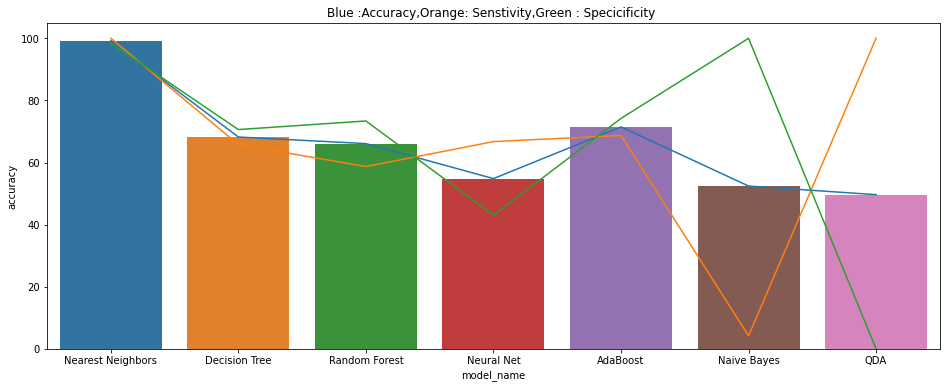

In [59]:
yes = x[x.CASE_STATUS==1]
no = x[x.CASE_STATUS==0]

no_upsampled = resample(no,
replace=True, 
n_samples=len(yes), 
random_state=27) 


upsampled = pd.concat([yes,no_upsampled])



trainX, testX = train_test_split(upsampled[upsampled.columns.difference(['CASE_STATUS'])], test_size=0.30, random_state=1)
trainY, testY = train_test_split(upsampled['CASE_STATUS'], test_size=0.30, random_state=1)

muller_loop(trainX, testX, trainY, testY)


## **DownSampling**

In [ ]:
yes = x[x.CASE_STATUS==1]
no = x[x.CASE_STATUS==0]

yes_downsampled = resample(yes,
replace=True, 
n_samples=len(no), 
random_state=27) 

downsampled = pd.concat([yes_downsampled,no])


trainX, testX = train_test_split(downsampled[downsampled.columns.difference(['CASE_STATUS'])], test_size=0.30, random_state=1)
trainY, testY = train_test_split(downsampled['CASE_STATUS'], test_size=0.30, random_state=1)

muller_loop(trainX, testX, trainY, testY)